In [51]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write, read
from scipy import signal

In [18]:
# 2. Create sine tone with sampling rate and duration used in project 1
Fs = 44100
speech_duration = 5 
frequency = 5000 # Sine tone Frequency of 5000 Hz

# Time array for the sine tone
t = np.linspace(0, speech_duration, int(Fs * speech_duration), endpoint=False)

# Generate the sine tone
sine_tone = np.sin(2 * np.pi * frequency * t)

In [19]:
# Play the sine tone
print("Playing sine tone...")
sd.play(sine_tone, Fs)
sd.wait()

Playing sine tone...


In [20]:
# Saves sine tone to a WAV file
file_name = "LeTai-sinetone.wav"
write(file_name, Fs, sine_tone)
print(f"Sine tone saved as '{file_name}'")

Sine tone saved as 'LeTai-sinetone.wav'


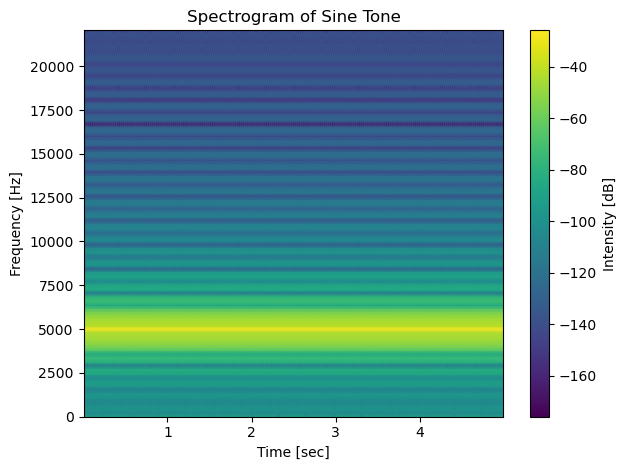

In [21]:
# Spectrogram Plot
frequencies, times, Sxx = signal.spectrogram(sine_tone, fs=Fs)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Sine Tone')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()

In [22]:
# 3. Generate a chirp signal from 0 to 8000 Hz
f_start = 0
f_end = 8000
chirp_signal = np.sin(2 * np.pi * (f_start * t + ((f_end - f_start) / (2 * speech_duration)) * t**2))

In [23]:
# Play the chirp signal
print("Playing chirp signal...")
sd.play(chirp_signal, Fs)
sd.wait()

Playing chirp signal...


In [25]:
# Save the chirp signal to a WAV file
file_name = "LeTai-chirp.wav"
write(file_name, Fs, chirp_signal)
print(f"Chirp signal saved as '{file_name}'")

Chirp signal saved as 'LeTai-chirp.wav'


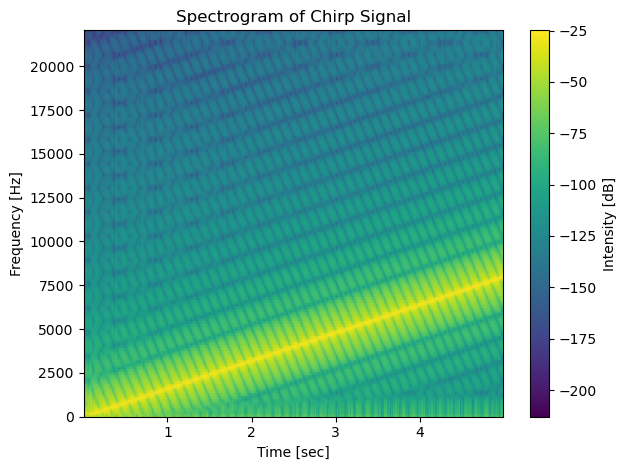

In [26]:
# Plot the spectrogram of the chirp signal
frequencies, times, Sxx = signal.spectrogram(chirp_signal, fs=Fs)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Chirp Signal')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()

In [40]:
# 4 Produce an approximate rendition of same sine tone pattern from CETK within 0 - 8000 Hz

# Duration of the sine tone pattern (in seconds)
total_duration = 5  # Total duration of the sine tone pattern
n_tones = 5  # Number of tones
duration_ratios = [0.1, 0.15, 0.2, 0.15, 0.4]  # Ratios of assumed duration for each tone

t = np.linspace(0, total_duration, int(Fs * total_duration), endpoint=False) # Time array for the sine tone pattern

# Define the frequencies for the five sine tones
frequencies = [5880, 6600, 5240, 2620, 3920] # Define the frequencies for the five sine tones - Found actual frequencies in
# comments of youtube video which were 293.7, 329.6, 261.6, 130.8, 196 and proportionally increased them to fit the range

In [41]:
# Generate the sine tone pattern
sine_tone_pattern = np.zeros_like(t)
start_index = 0
for freq, duration_ratio in zip(frequencies, duration_ratios):
    tone_duration = int(Fs * total_duration * duration_ratio)
    tone = np.sin(2 * np.pi * freq * t[start_index:start_index+tone_duration])
    sine_tone_pattern[start_index:start_index+tone_duration] = tone
    start_index += tone_duration

In [42]:
# Play the sine tone pattern
print("Playing CETK sine tone pattern...")
sd.play(sine_tone_pattern, Fs)
sd.wait()

Playing CETK sine tone pattern...


In [43]:
# Save the CETK sine tone pattern to a WAV file
file_name = "LeTai-cetk.wav"
write(file_name, Fs, sine_tone_pattern)
print(f"CETK sine tone pattern saved as '{file_name}'")

CETK sine tone pattern saved as 'LeTai-cetk.wav'


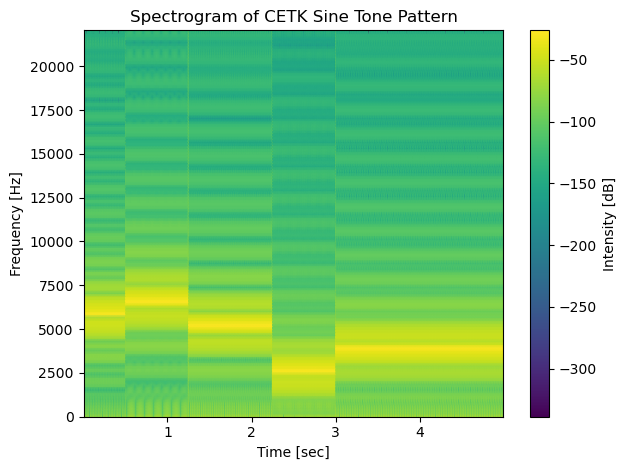

In [44]:
# Plot the spectrogram of the sine tone pattern
frequencies, times, Sxx = signal.spectrogram(sine_tone_pattern, fs=Fs)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of CETK Sine Tone Pattern')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()

In [50]:
# 5 Combining Sound Files

# Re-record audio since I had trouble loading file
print("Recording...")
audio_data = sd.rec(int(duration * Fs), samplerate=Fs, channels=1, dtype='int16')
sd.wait()  # Wait until recording is finished

print("Finished recording.")

# Save the re-recorded audio to a WAV file
file_name = "brownfox.wav"
write(file_name, Fs, audio_data)

print(f"Audio recorded and saved as '{file_name}'")

Recording...
Finished recording.
Audio recorded and saved as 'brownfox.wav'


In [56]:
# Now I may load this file and combine it with the sine tone
file_name = "brownfox.wav"
Fs, recorded_audio = read(file_name)
# Regenerate the 5000 Hz sine tone
duration = len(recorded_audio) / Fs
t = np.linspace(0, duration, len(recorded_audio), endpoint=False)
frequency = 5000
sine_tone = np.sin(2 * np.pi * frequency * t)
# Combine the recorded audio with the sine tone
combined_audio = recorded_audio + sine_tone

In [57]:
# Play the combined audio
print("Playing the combined audio...")
sd.play(combined_audio, Fs)
sd.wait()

Playing the combined audio...


In [58]:
# Save the combined audio signal to a WAV file
output_file = "LeTai-speechchirp.wav"
write(output_file, Fs, combined_audio)
print(f"Resulting signal saved as '{output_file}'")

Resulting signal saved as 'LeTai-speechchirp.wav'


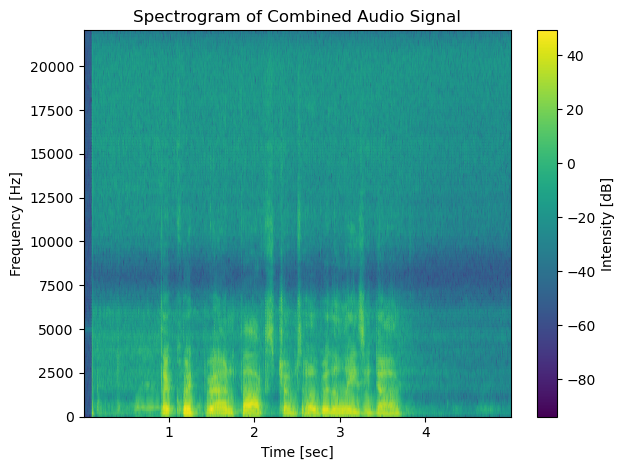

In [60]:
# Plot the spectrogram of the resulting signal
frequencies, times, Sxx = signal.spectrogram(combined_audio, fs=Fs)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Combined Audio Signal')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()

In [61]:
# Speech and Audio Filtering - Designing a lowpass filter with cut-off frequency of 4000 Hz

# Load the combined speech and sine tone signal
file_name = "LeTai-speechchirp.wav"
Fs, combined_signal = read(file_name)

cutoff_frequency = 4000
nyquist_frequency = 0.5 * Fs
cutoff_normalized = cutoff_frequency / nyquist_frequency
b, a = signal.butter(4, cutoff_normalized, btype='low')

# Apply the filter to the combined signal
filtered_signal = signal.filtfilt(b, a, combined_signal)

In [62]:
# Play the filtered signal
print("Playing the filtered signal...")
sd.play(filtered_signal, Fs)
sd.wait()

Playing the filtered signal...


In [63]:
# Save the filtered signal to a WAV file
output_file = "LeTai-filteredspeechsine.wav"
write(output_file, Fs, filtered_signal)
print(f"Filtered signal saved as '{output_file}'")

Filtered signal saved as 'LeTai-filteredspeechsine.wav'


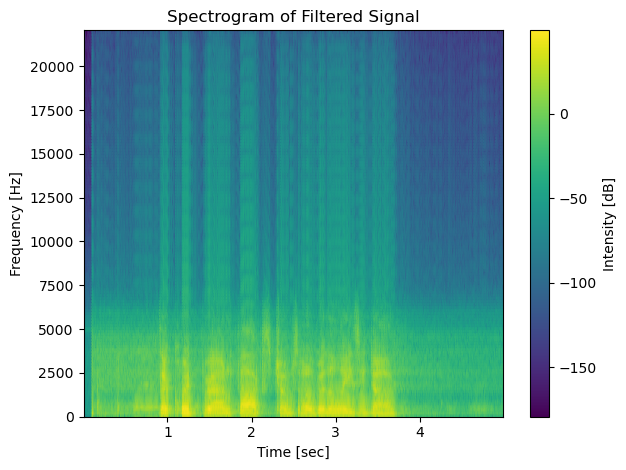

In [64]:
# Plot the spectrogram of the filtered signal
frequencies, times, Sxx = signal.spectrogram(filtered_signal, fs=Fs)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Filtered Signal')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()